In [1]:
import joblib 
import numpy as np 
from matplotlib import pyplot as plt 
from uncertainties import ufloat, unumpy

from pathlib import Path
from tqdm import tqdm
from numpy import array
import sys
sys.path.append("..")
from core.utils import *
import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)
import random
import mplhep as hep
hep.style.use("ATLAS")

In [2]:
#pkl_path_500 = joblib.load('/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_500/nominal/plots/ADE/SFs_pkls/GBDT_newScore_quark_reweighting_weights/SFs.pkl')
pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao'
#pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/eta_dependency_flat_eta/nominal'
pkl_path = Path(pkl_path)

In [3]:
unumpy.nominal_values(pkl_path_500['GBDT_newScore'][0.5]['Gluon'])

NameError: name 'pkl_path_500' is not defined

In [3]:
reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5, 0.6, 0.7, 0.8]
label_eta_bin = [0, 0.5, 1.0, 1.5, 2.1]
bin_centers = 0.5 * (np.array(label_pt_bin[:-1]) + np.array(label_pt_bin[1:]))


Map_var_title = {
    "jet_pt": "$p_{T}$",
    "jet_nTracks": "$n_{trk}$",
    "jet_trackBDT": "old BDT",
    "jet_eta": "$\eta$",
    "jet_trackC1": "$C_{1}$",
    "jet_trackWidth": "$w^{trk}$",
    "GBDT_newScore": "BDT"
}


In [4]:
syst_total = joblib.load("/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/syst_uncertainties/syst_total.pkl")
#syst_total = joblib.load('/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/syst_uncertainties/syst_total.pkl')

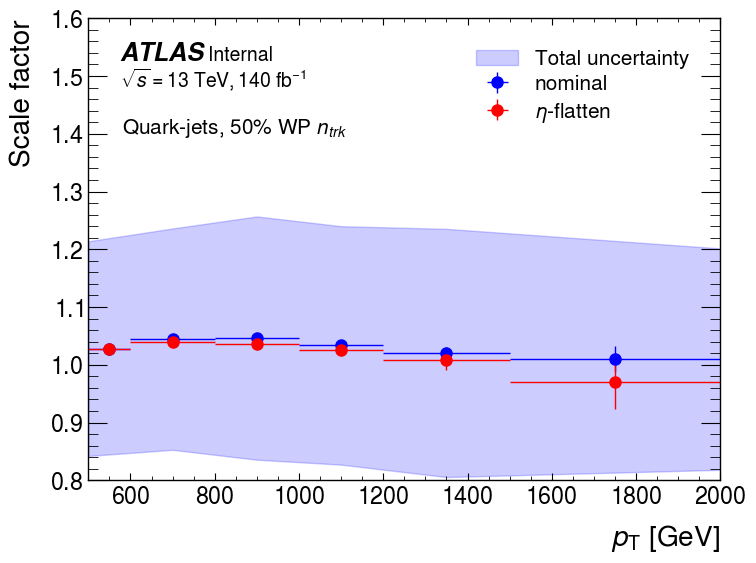

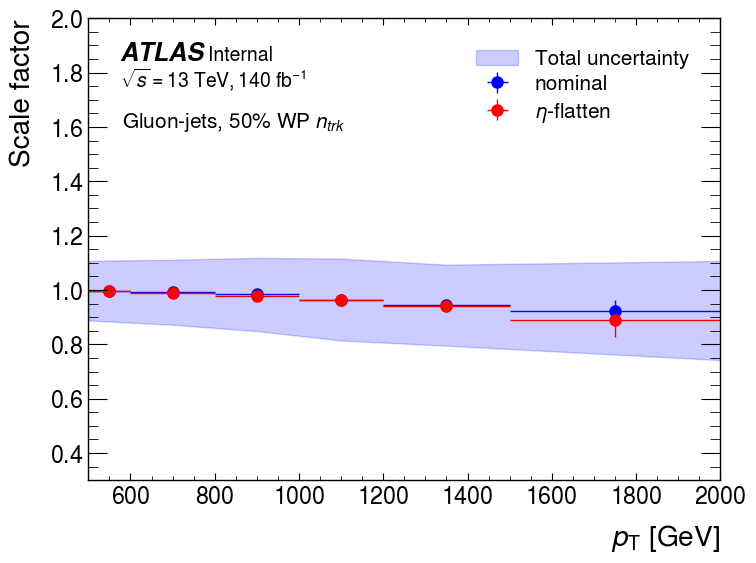

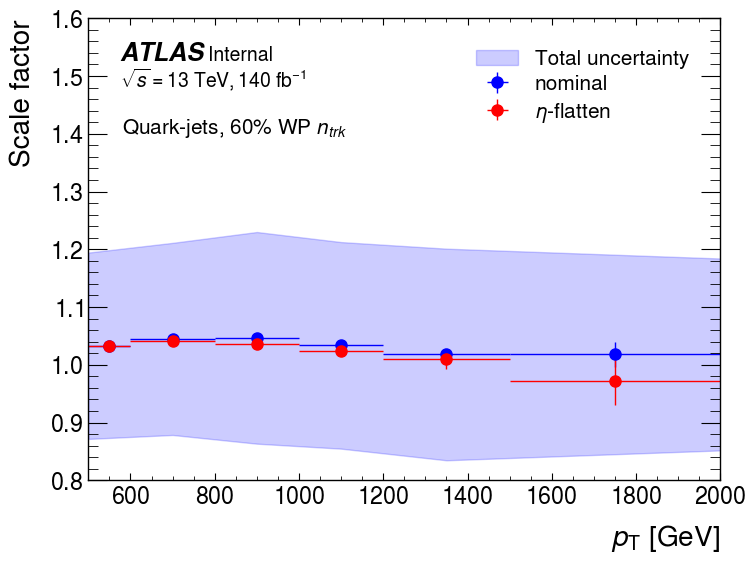

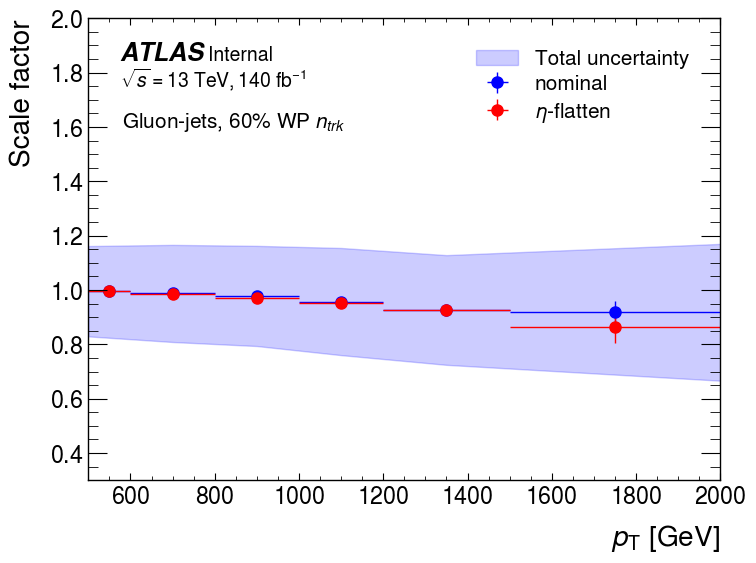

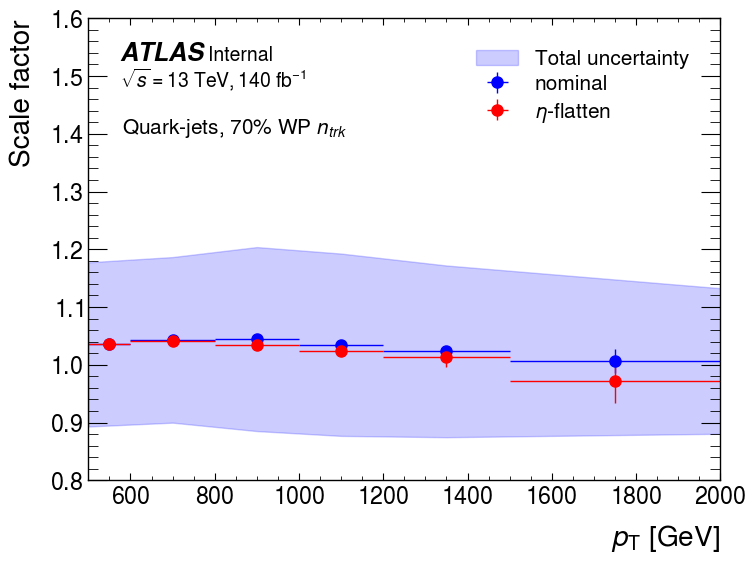

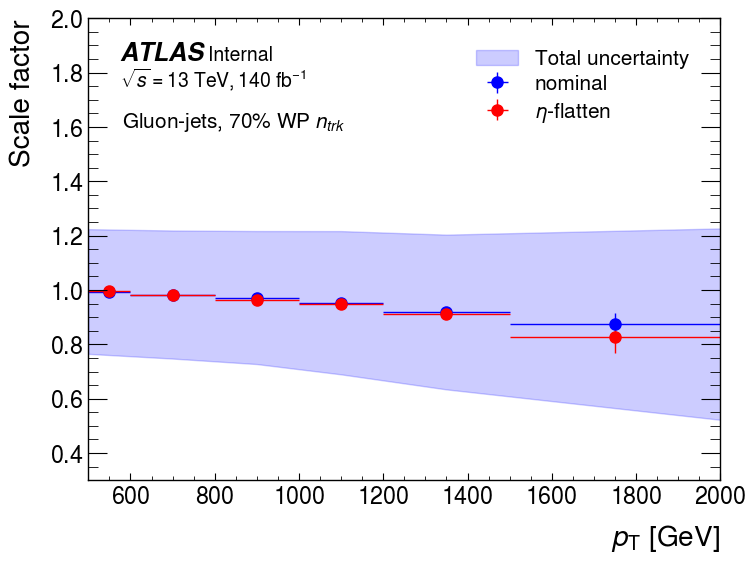

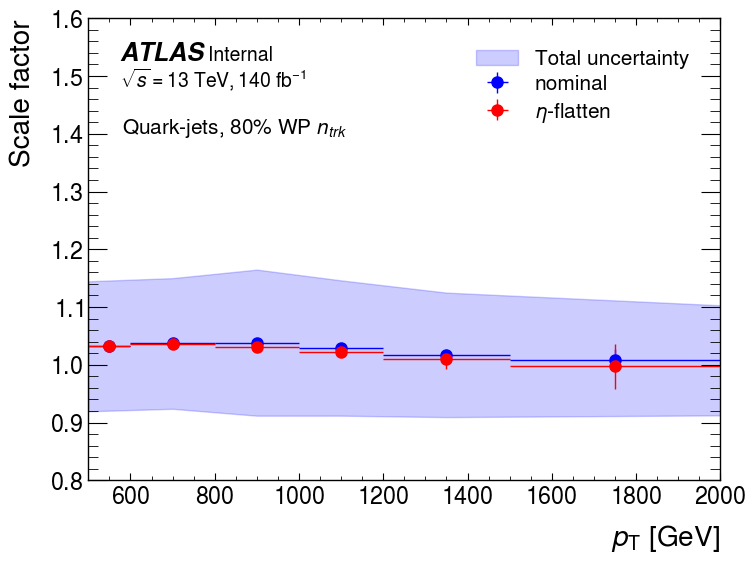

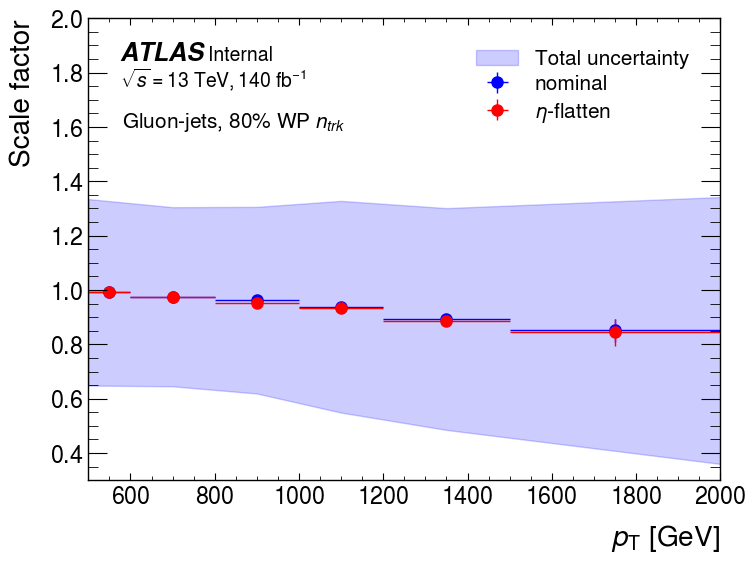

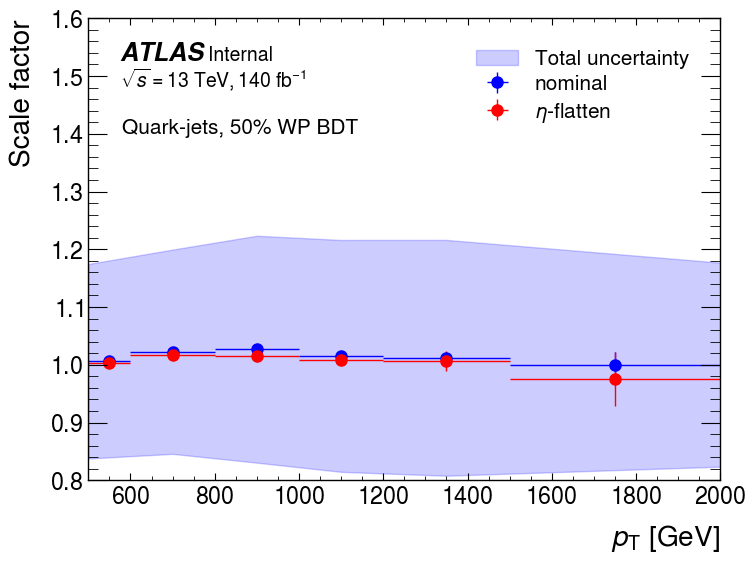

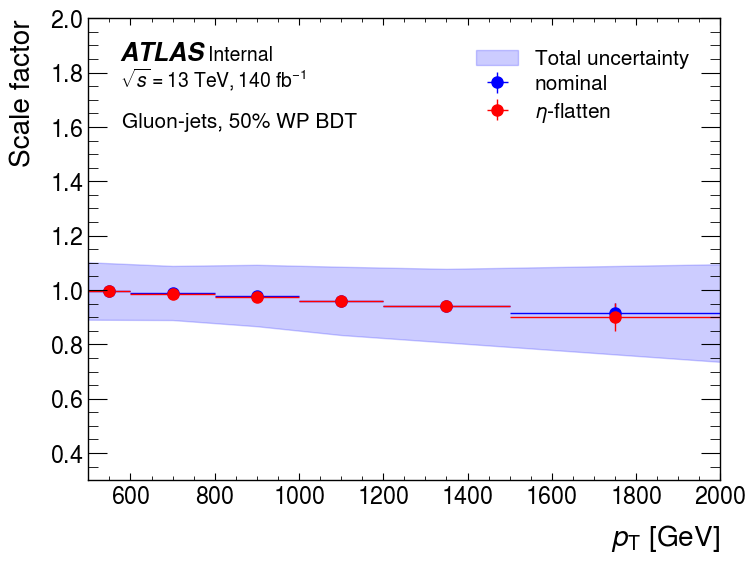

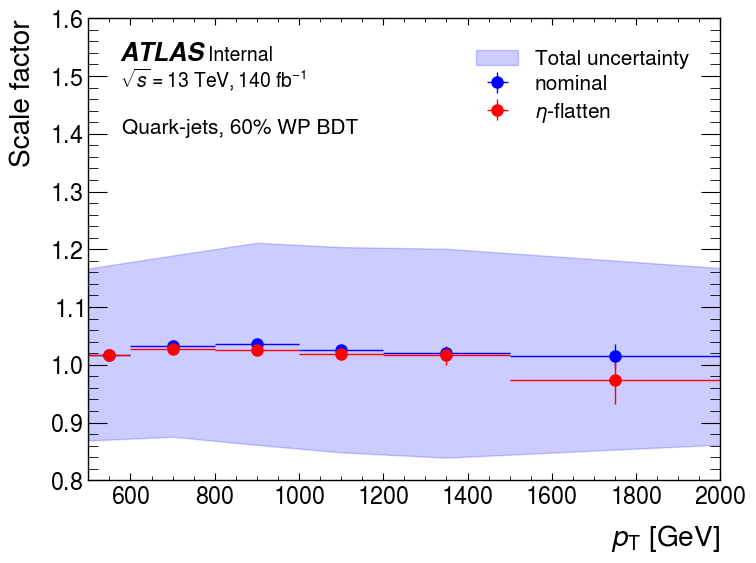

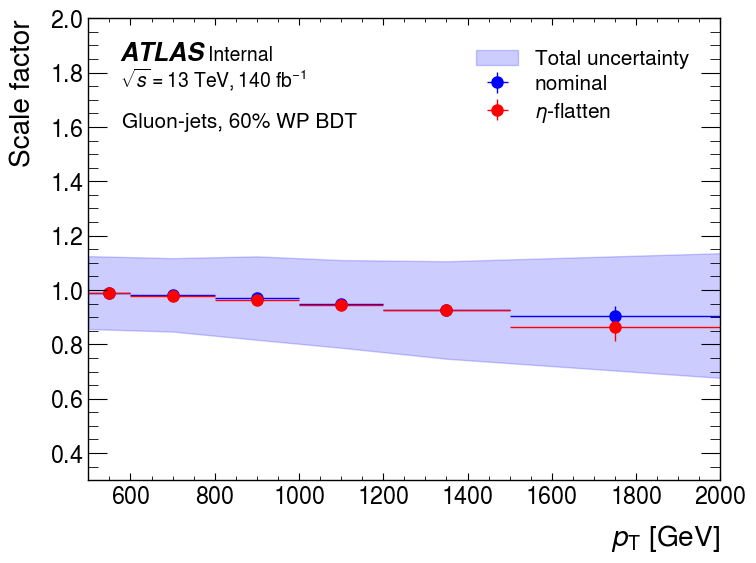

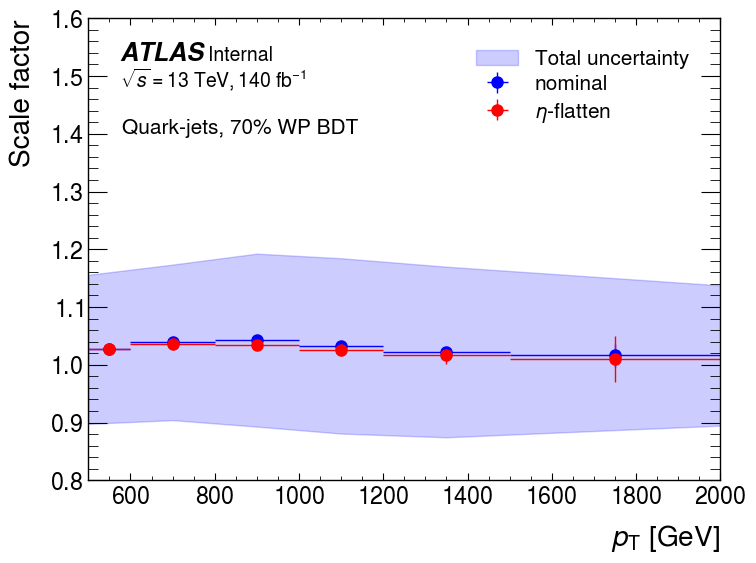

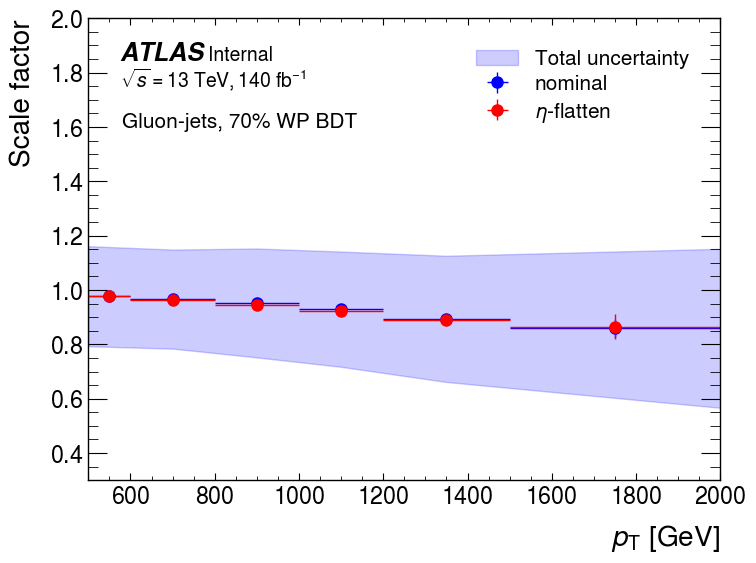

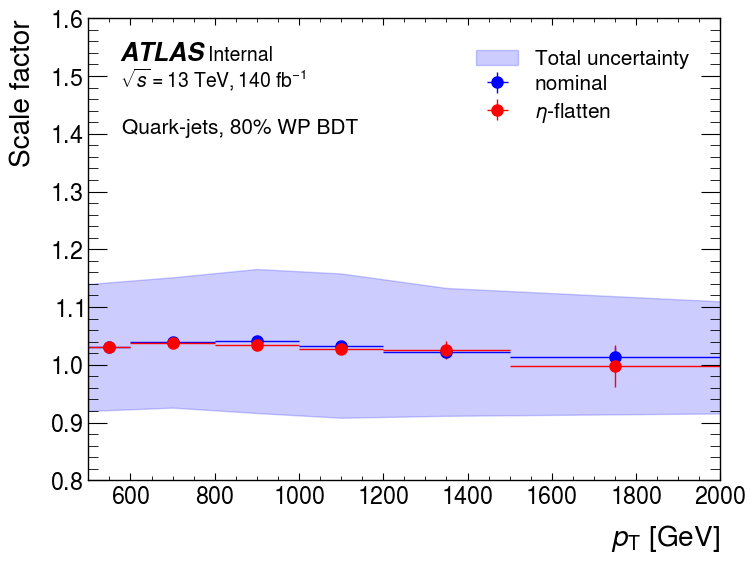

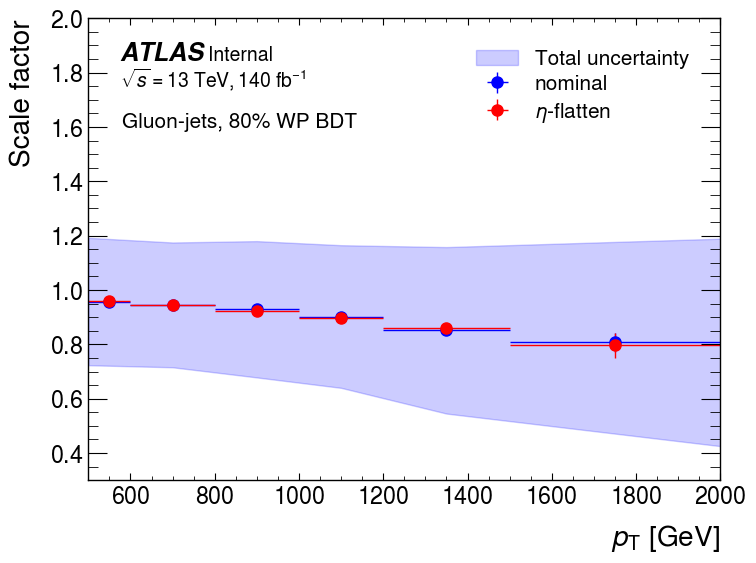

In [6]:
ind = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
ind_all = ind(15)
bin_centers1 = [500,700,900,1100,1350,2000]
#label_pt_bin = label_eta_bin
#bin_centers = 0.5 * (np.array(label_pt_bin[:-1]) + np.array(label_pt_bin[1:]))

#linestyle_list=['-',':',"-.","--"]
color_list=['forestgreen','yellow','cyan','orchid']

yerr_eta = [0.18587531,0.10974434,0.16842143,0.10565531]
yerr_sf = [1.02793334,0.99763966,1.00606012,0.99635244]

e = 0
for i_var, reweighting_var in enumerate(reweighting_vars):

    nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'SFs_pkls'
    nominal_SFs = joblib.load(nominal_path / nominal_keys[i_var] / "SFs.pkl") # this includes many vars with WPs 
    eta_SF = joblib.load(f'/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/eta_dependency_flat_eta/nominal/nominal/plots/ADE/SFs_pkls/{nominal_keys[i_var]}/SFs.pkl')

    for WP in WPs:
        WP1=int(WP*100)
        for parton in ['Quark','Gluon']:
            fig, ax = plt.subplots()
            quark_nominal_values = unumpy.nominal_values(nominal_SFs[reweighting_var][WP][parton])
            q_dev=unumpy.std_devs(nominal_SFs[reweighting_var][WP][parton])

            quark_total_uncertainty = []

            quark_eta = unumpy.nominal_values(eta_SF[reweighting_var][WP][parton])
            q_dev_eta=unumpy.std_devs(eta_SF[reweighting_var][WP][parton])


            ee=0
            for indx, key in enumerate(syst_total[reweighting_var].keys()):
               # indx = list(syst_total[reweighting_var]).index(key)
                indc = ind_all[indx]
                quark_uncertainty = syst_total[reweighting_var][key][WP][parton]
                quark_total_uncertainty.append(syst_total[reweighting_var][key][WP][parton])

            quark_total_uncertainty = np.sqrt(np.sum(np.power(quark_total_uncertainty, 2), axis=0))

            #print(f"{parton} {reweighting_var} SF: ",quark_nominal_values)#,"syst: ",quark_total_uncertainty)
            
            ax.fill_between(bin_centers1,quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty,alpha=0.2, label=f'Total uncertainty',facecolor='b',edgecolor='b')
            #ax.fill_between(bin_centers1,quark_nominal_values-quark_theory_uncertainty, quark_nominal_values+quark_theory_uncertainty,alpha=1, label=f'Theoretical uncertainty',facecolor='none',edgecolor='salmon',linestyle='-',lw=2.5)#edgecolor='salmon'
            #ax.fill_between(bin_centers1,quark_nominal_values-quark_exp_uncertainty, quark_nominal_values+quark_exp_uncertainty,alpha=1, label=f'Experimenetal uncertainty',facecolor='none',edgecolor='g',linestyle='-',lw=2.5)

            #hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Scale factor',ax=ax,histtype='errorbar',xerr=True,yerr=0,color='b',marker='o',markersize=4)
            hep.histplot(quark_nominal_values,bins=label_pt_bin,label='nominal',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev,color='b',marker='o',markersize=8)
            hep.histplot(quark_eta,bins=label_pt_bin,label=r'$\eta$-flatten',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev_eta,color='r',marker='o',markersize=8)

            #hep.histplot(quark_nominal_values+quark_total_uncertainty,bins=label_pt_bin,label='Total uncertainty',ax=ax,histtype='fill',color='blue',alpha=0.1)
            #hep.histplot(quark_nominal_values-quark_total_uncertainty,bins=label_pt_bin,ax=ax,histtype='fill',facecolor='white',alpha=1)
            #hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Theoretical uncertainty',ax=ax,histtype='errorbar',xerr=True,yerr=quark_theory_uncertainty,color='b',marker='o',markersize=4)
            
            #### eta bin
            # hep.histplot(quark_nominal_values,bins=label_pt_bin,label=f'{parton} jets',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev,color='b',marker='o',markersize=4)
            # ax.fill_between(label_pt_bin,yerr_sf[e]-yerr_eta[e], yerr_sf[e]+yerr_eta[e], facecolor = 'orange', alpha=0.3,label='Total uncertainty')
            # e+=1
            
            # ax[0].fill_between(bin_centers1, quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty, \
            #                     facecolor='blue', alpha=0.1, label=f'Total uncertainty')

            # ax[1].fill_between(bin_centers1, gluon_nominal_values-gluon_total_uncertainty, gluon_nominal_values+gluon_total_uncertainty, \
            #                     facecolor='red', alpha=0.1, label=f'Total uncertainty')
            #parton_total_uncertainty[reweighting_var][WP]['Quark'] = quark_total_uncertainty
            #parton_total_uncertainty[reweighting_var][WP]['Gluon'] = gluon_total_uncertainty
            ax.set_xlim(label_pt_bin[0], label_pt_bin[-1])
            if parton == 'Gluon':
                ax.set_ylim(0.3,2) #0.4,1.9
                ax.text(580,1.6,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1

            else:
                ax.set_ylim(0.8,1.6) 
                ax.text(580,1.4,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1
            ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')

            ax.set_ylabel('Scale factor')
            ax.legend(fontsize=15)
            hep.atlas.label(label='Internal',ax=ax,lumi=140,data=True)

            fig.savefig(f"../syst_uncertainties_note_flate_eta/{reweighting_var}_WP{WP}_{parton}_comp.pdf")


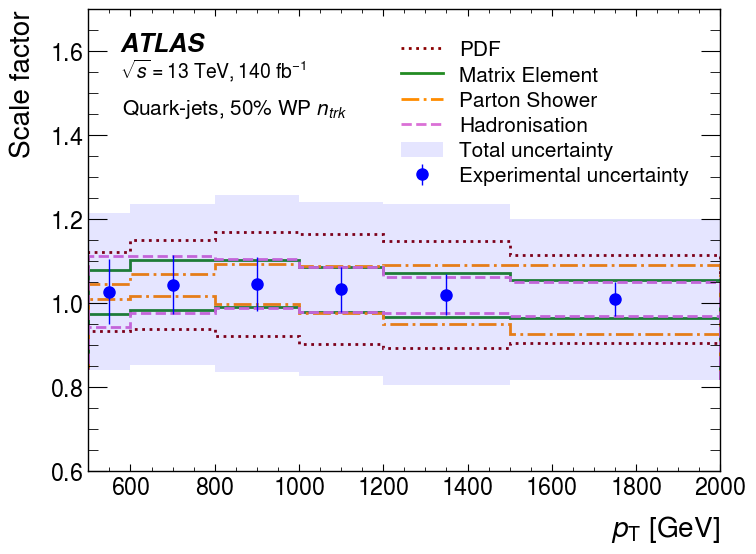

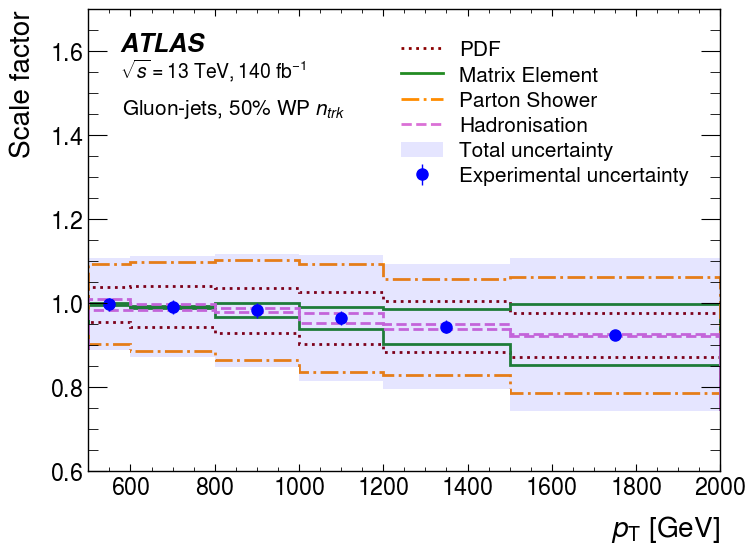

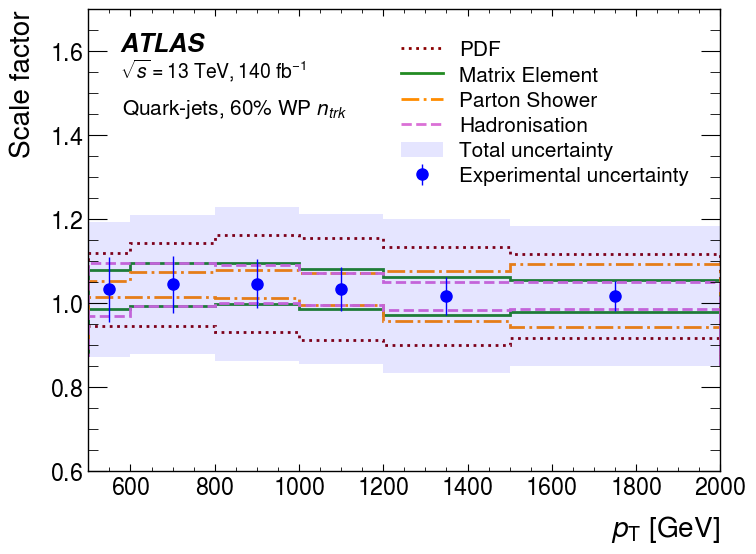

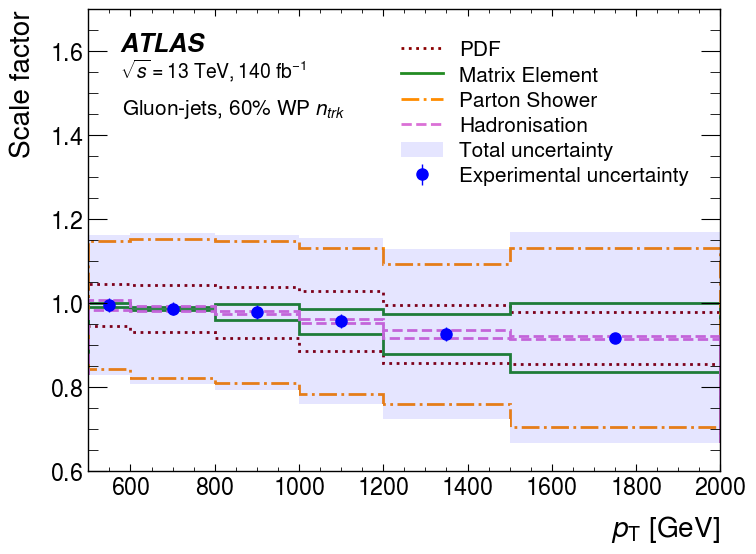

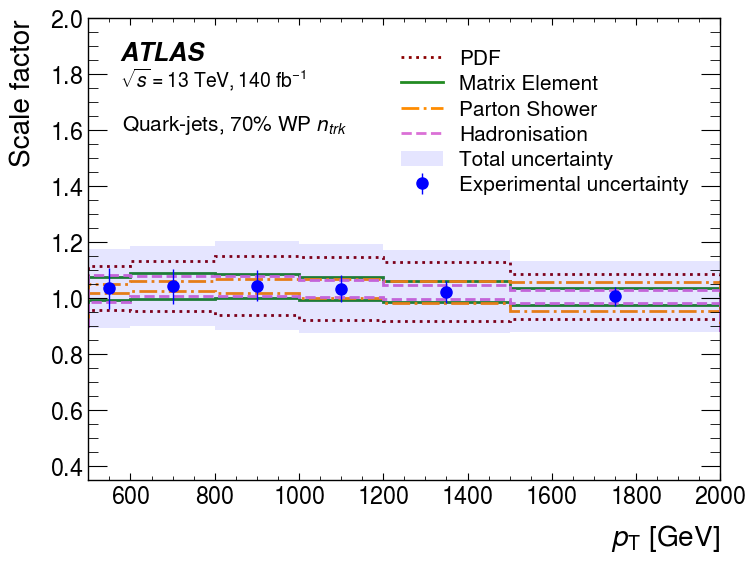

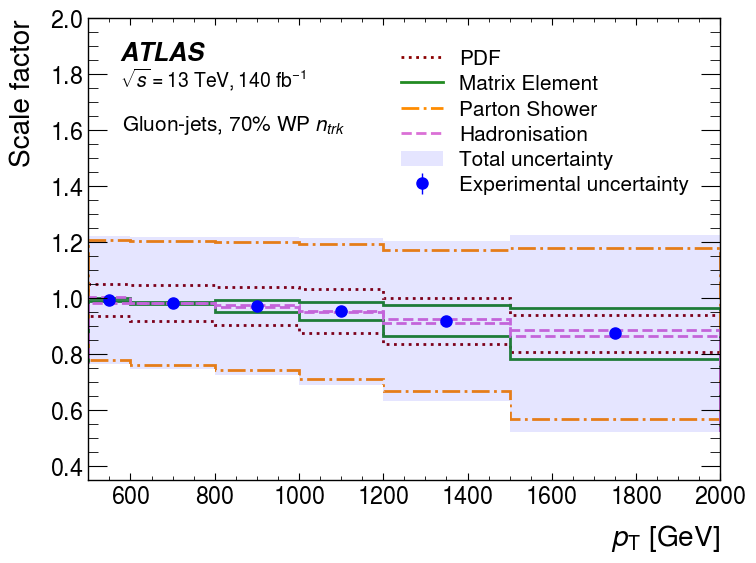

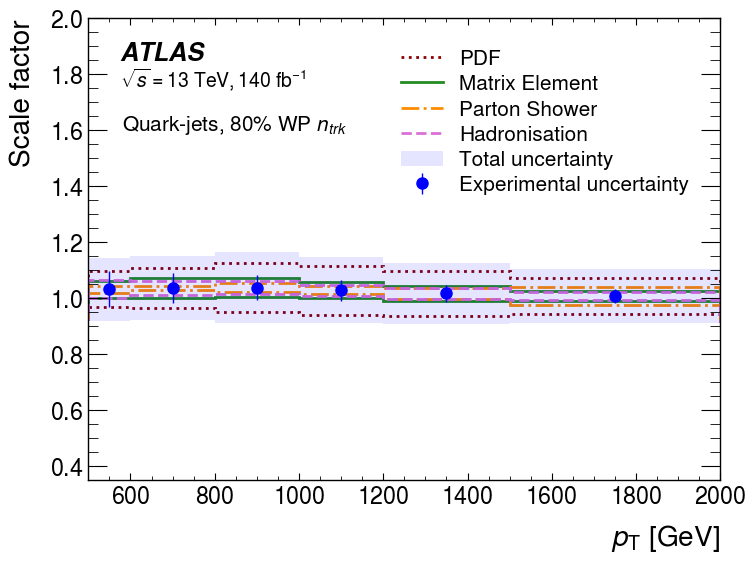

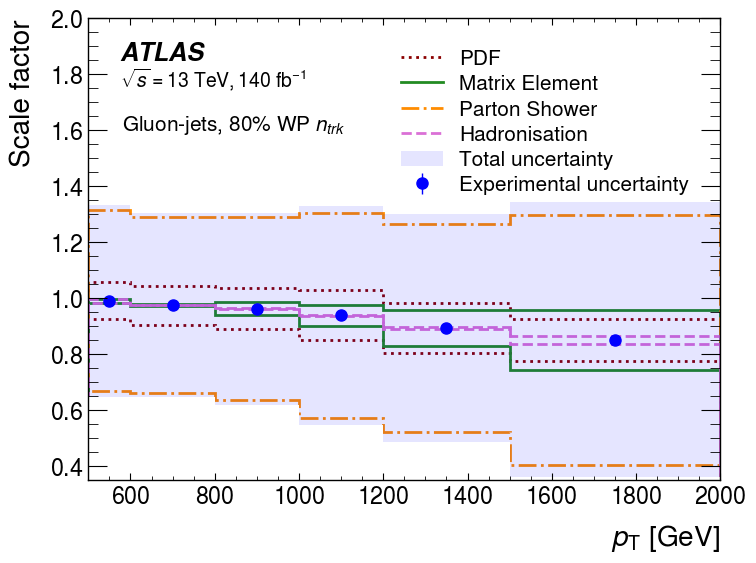

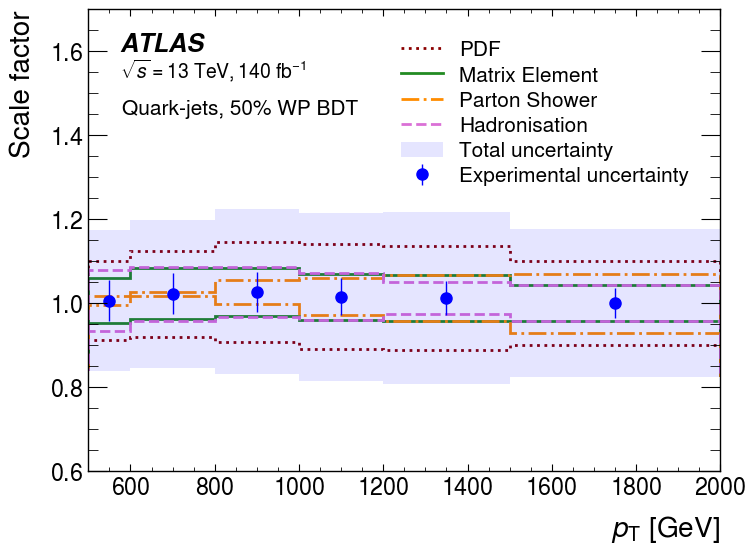

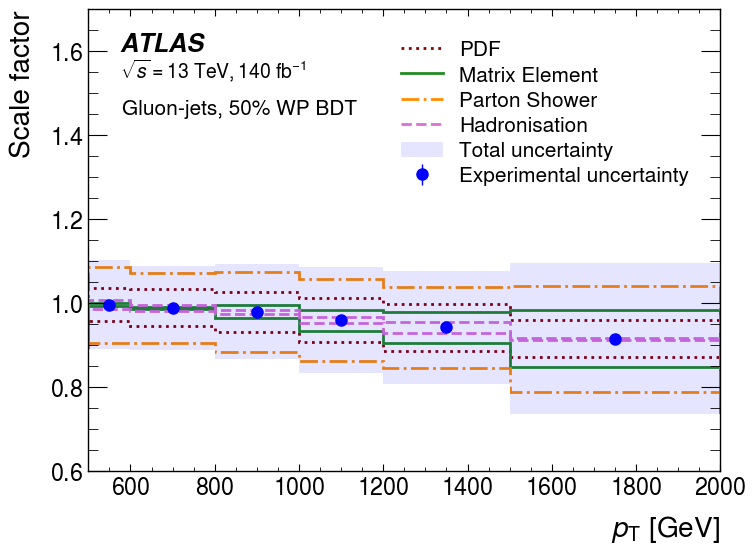

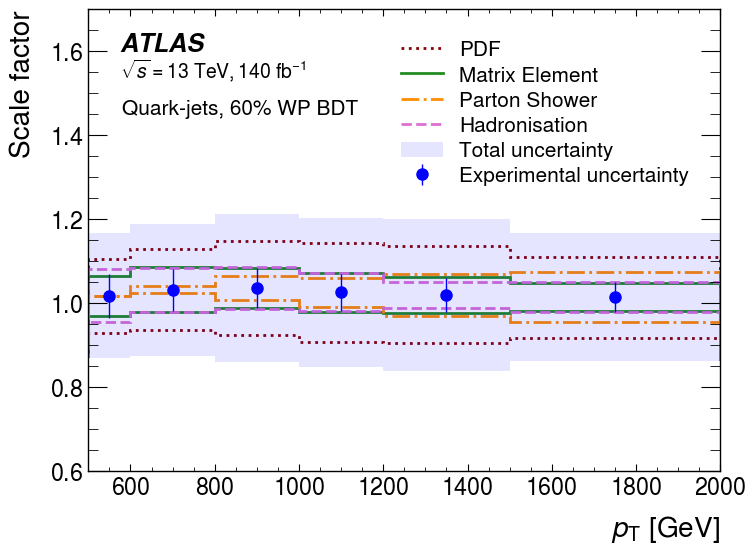

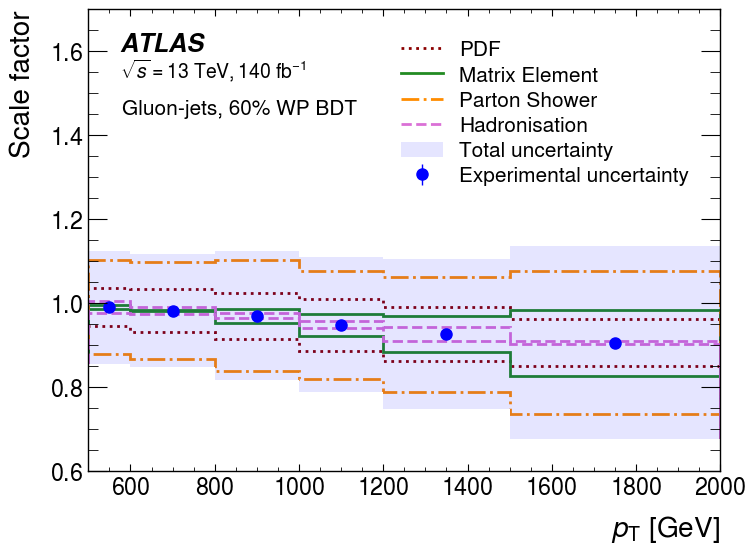

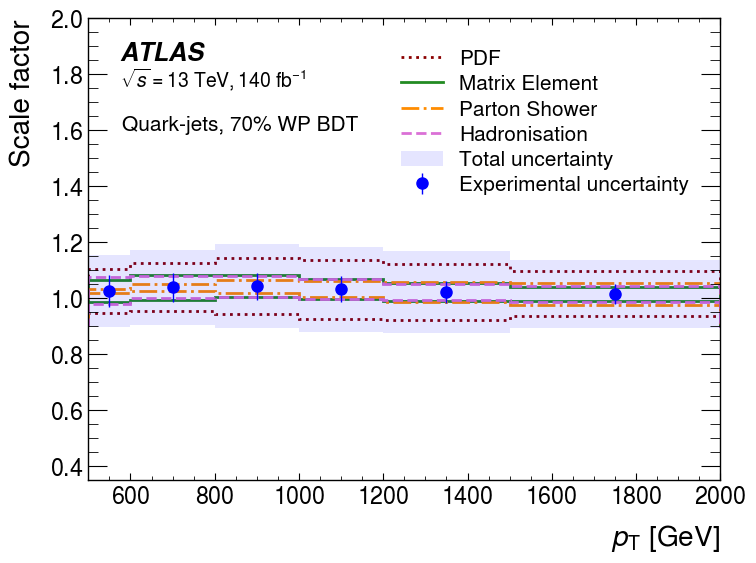

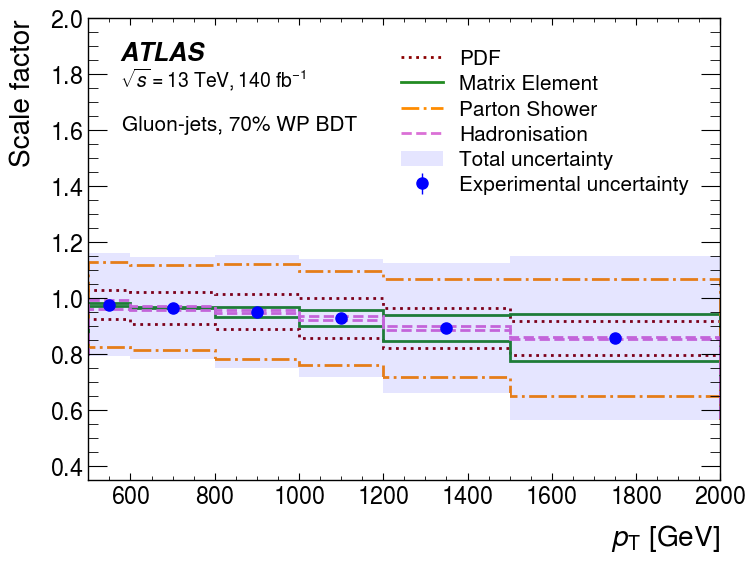

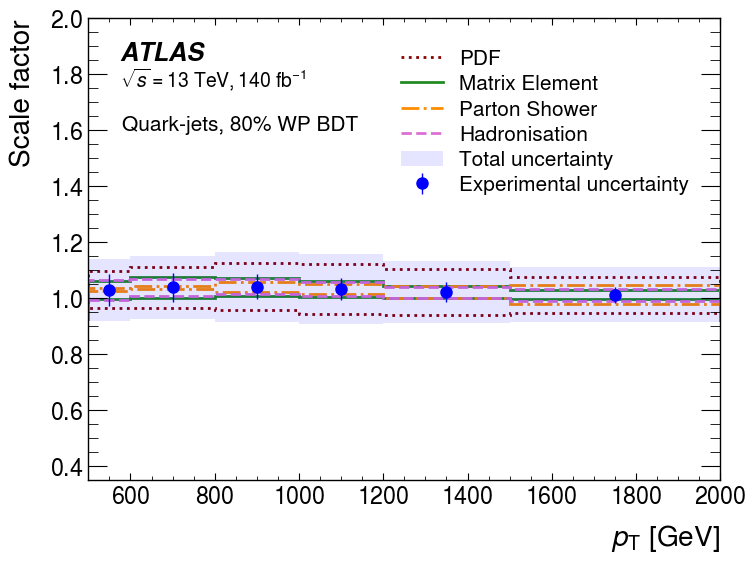

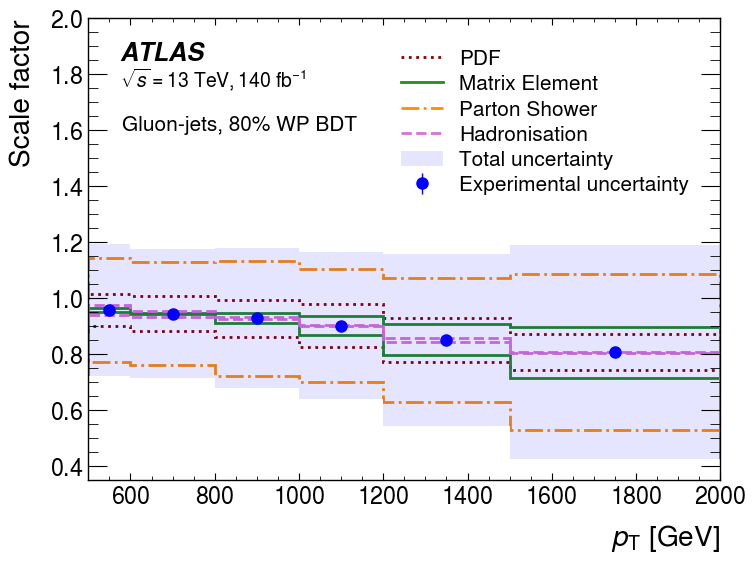

In [5]:
ind = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
ind_all = ind(15)
bin_centers1 = [500,700,900,1100,1350,2000]
#label_pt_bin = label_eta_bin
#bin_centers = 0.5 * (np.array(label_pt_bin[:-1]) + np.array(label_pt_bin[1:]))

linestyle_list=[':','-',"-.","--"]
color_list=['darkred','forestgreen','darkorange','orchid']

yerr_eta = [0.18587531,0.10974434,0.16842143,0.10565531]
yerr_sf = [1.02793334,0.99763966,1.00606012,0.99635244]

Map_Key = {
    "parton_shower": "Parton Shower",
    "hadronization": "Hadronisation",
    "matrix_element": "Matrix Element",
    "pdf_weight": "PDF",
    "JESJER": "JES/JER",
    "trk_eff": "Tracking"
}

e = 0
for i_var, reweighting_var in enumerate(reweighting_vars):

    nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'SFs_pkls'
    nominal_SFs = joblib.load(nominal_path / nominal_keys[i_var] / "SFs.pkl") # this includes many vars with WPs 
    
    for WP in WPs:
        WP1=int(WP*100)
        for parton in ['Quark','Gluon']:
            fig, ax = plt.subplots()
            quark_nominal_values = unumpy.nominal_values(nominal_SFs[reweighting_var][WP][parton])
            q_dev=unumpy.std_devs(nominal_SFs[reweighting_var][WP][parton])

            quark_total_uncertainty = []
            quark_theory_uncertainty = []
            quark_exp_uncertainty = []
            ee=0
            for indx, key in enumerate(syst_total[reweighting_var].keys()):
               # indx = list(syst_total[reweighting_var]).index(key)
                indc = ind_all[indx]
                quark_uncertainty = syst_total[reweighting_var][key][WP][parton]
                quark_total_uncertainty.append(syst_total[reweighting_var][key][WP][parton])

                # if key == 'JESJER':
                #     key = 'JES/JER'

                if key in ['parton_shower','hadronization','matrix_element','pdf_weight']:#,'scale_variation','matrix_element','splitting_kernel']:
                    quark_theory_uncertainty.append(syst_total[reweighting_var][key][WP][parton])
                    hep.histplot(quark_nominal_values-quark_uncertainty,bins=label_pt_bin,label=f'{Map_Key[key]}',ax=ax,histtype='step',color=color_list[ee],linestyle=linestyle_list[ee],lw=2)
                    hep.histplot(quark_nominal_values+quark_uncertainty,bins=label_pt_bin,ax=ax,histtype='step',color=color_list[ee],linestyle=linestyle_list[ee],lw=2)

                    #ax.fill_between(bin_centers1,quark_nominal_values-quark_uncertainty, quark_nominal_values+quark_uncertainty,                             # color='b',
                    #        alpha=1, label=f'{Map_Key[key]}',facecolor='none',edgecolor=color_list[ee],lw=2.5)
                    ee+=1


                if key in ['JESJER','trk_eff']: 
                    quark_exp_uncertainty.append(syst_total[reweighting_var][key][WP][parton])
                
            quark_exp_uncertainty=np.sqrt(np.sum(np.power(quark_exp_uncertainty, 2), axis=0))
            quark_theory_uncertainty=np.sqrt(np.sum(np.power(quark_theory_uncertainty, 2), axis=0))
            quark_total_uncertainty = np.sqrt(np.sum(np.power(quark_total_uncertainty, 2), axis=0))

            #print(f"{parton} {reweighting_var} SF: ",quark_nominal_values)#,"syst: ",quark_total_uncertainty)
            
            #ax.fill_between(bin_centers1,quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty,alpha=0.1, label=f'Total uncertainty',facecolor='b',edgecolor='b')
            #ax.fill_between(bin_centers1,quark_nominal_values-quark_theory_uncertainty, quark_nominal_values+quark_theory_uncertainty,alpha=1, label=f'Theoretical uncertainty',facecolor='none',edgecolor='salmon',linestyle='-',lw=2.5)#edgecolor='salmon'
            #ax.fill_between(bin_centers1,quark_nominal_values-quark_exp_uncertainty, quark_nominal_values+quark_exp_uncertainty,alpha=1, label=f'Experimenetal uncertainty',facecolor='none',edgecolor='g',linestyle='-',lw=2.5)

            #hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Scale factor',ax=ax,histtype='errorbar',yerr=0,color='b',marker='o',markersize=4)
            hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Experimental uncertainty',ax=ax,histtype='errorbar',yerr=quark_exp_uncertainty,color='b',marker='o',markersize=8)

            hep.histplot(quark_nominal_values+quark_total_uncertainty,bins=label_pt_bin,label='Total uncertainty',ax=ax,histtype='fill',color='blue',alpha=0.1)
            hep.histplot(quark_nominal_values-quark_total_uncertainty,bins=label_pt_bin,ax=ax,histtype='fill',facecolor='white',alpha=1)
            #hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Theoretical uncertainty',ax=ax,histtype='errorbar',xerr=True,yerr=quark_theory_uncertainty,color='b',marker='o',markersize=4)
            
            #### eta bin
            # hep.histplot(quark_nominal_values,bins=label_pt_bin,label=f'{parton} jets',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev,color='b',marker='o',markersize=4)
            # ax.fill_between(label_pt_bin,yerr_sf[e]-yerr_eta[e], yerr_sf[e]+yerr_eta[e], facecolor = 'orange', alpha=0.3,label='Total uncertainty')
            # e+=1
            
            # ax[0].fill_between(bin_centers1, quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty, \
            #                     facecolor='blue', alpha=0.1, label=f'Total uncertainty')

            # ax[1].fill_between(bin_centers1, gluon_nominal_values-gluon_total_uncertainty, gluon_nominal_values+gluon_total_uncertainty, \
            #                     facecolor='red', alpha=0.1, label=f'Total uncertainty')
            #parton_total_uncertainty[reweighting_var][WP]['Quark'] = quark_total_uncertainty
            #parton_total_uncertainty[reweighting_var][WP]['Gluon'] = gluon_total_uncertainty
            ax.set_xlim(label_pt_bin[0], label_pt_bin[-1])
            if WP1>60:
                ax.set_ylim(0.35,2) #0.4,1.9
                ax.text(580,1.6,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1

            else:
                ax.set_ylim(0.6,1.7) 
                ax.text(580,1.45,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1
            ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')
            #ax.set_xlabel('$\eta$')

            ax.set_ylabel('Scale factor')
            ax.legend(fontsize=15)
            hep.atlas.label(ax=ax,lumi=140,data=True)

            fig.savefig(f"../syst/{reweighting_var}_WP{WP}_{parton}_ther.pdf")
            #fig.savefig(f"../syst_uncertainties_note_flate_eta/{reweighting_var}_WP{WP}_{parton}_comp.pdf")


## Draw combined syst

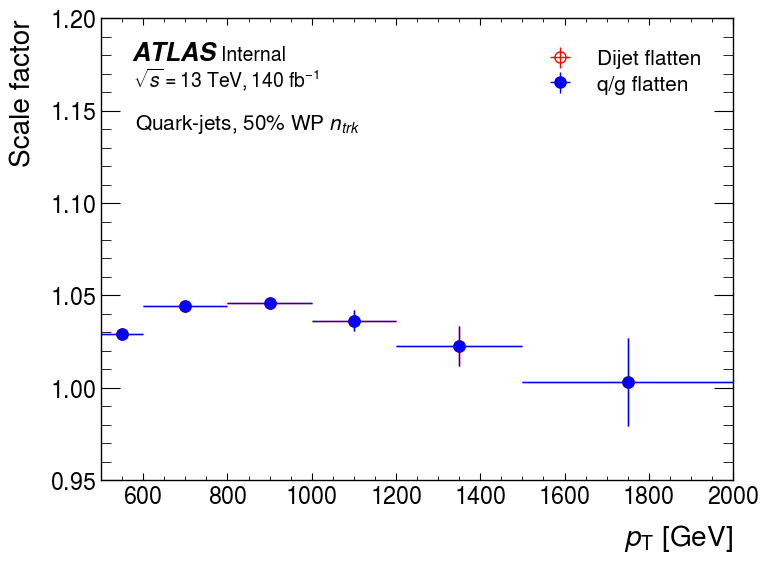

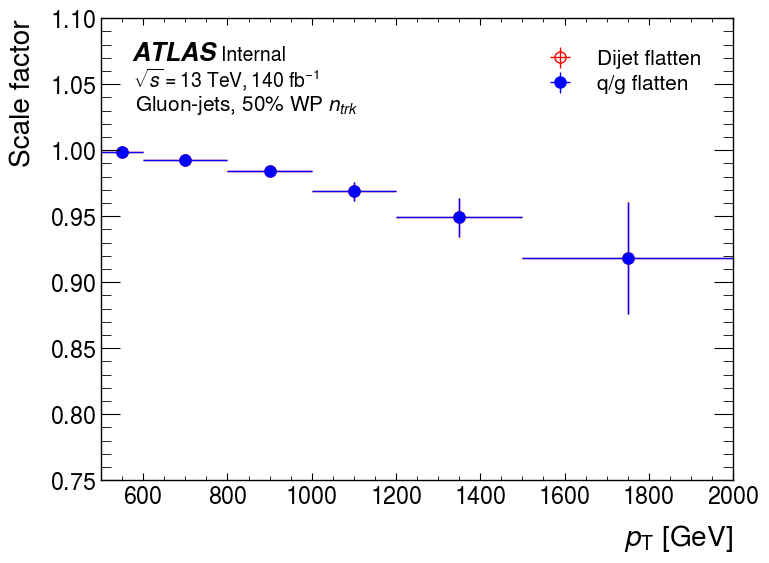

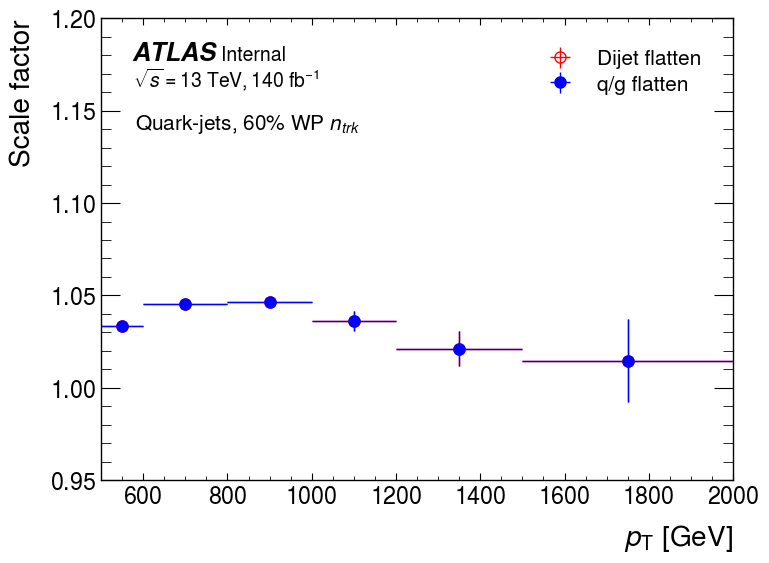

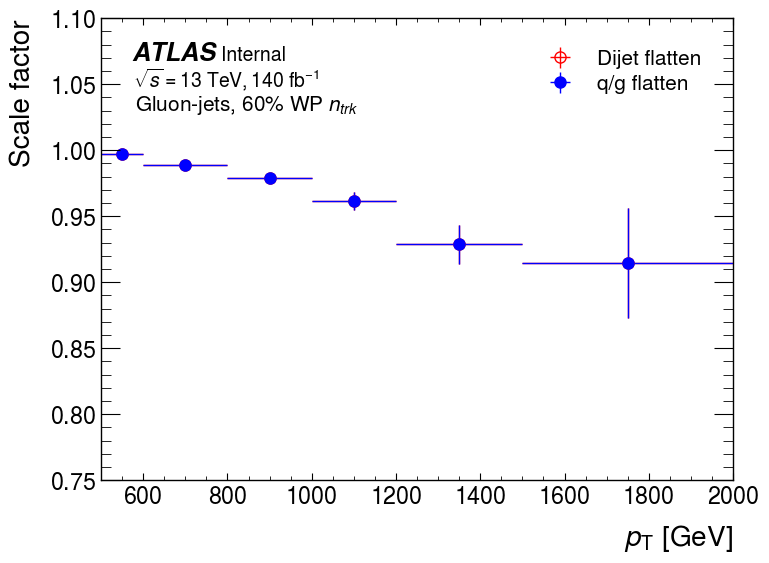

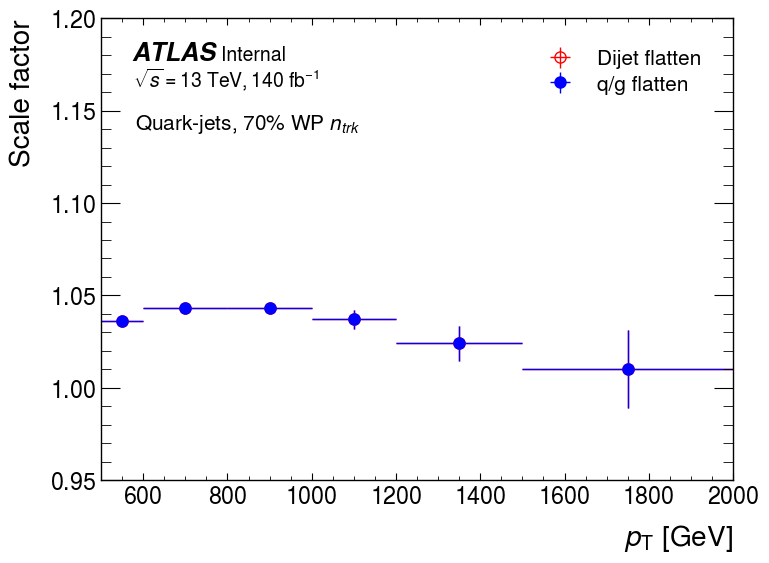

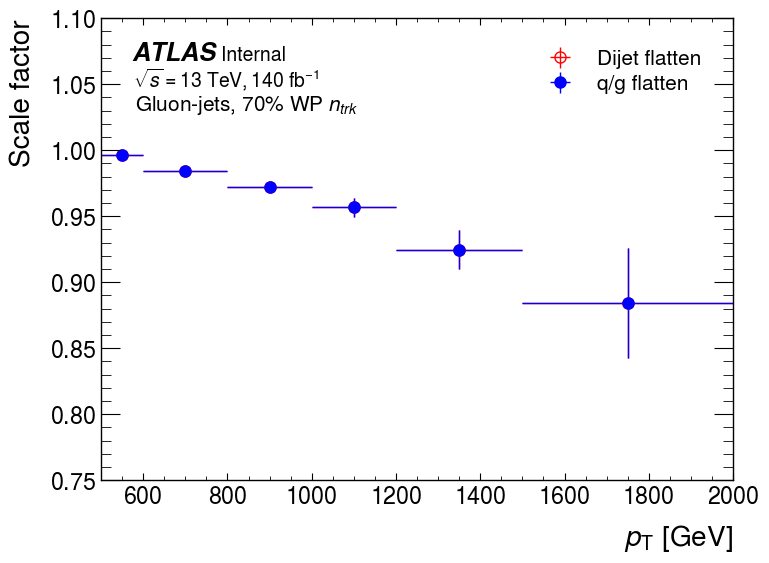

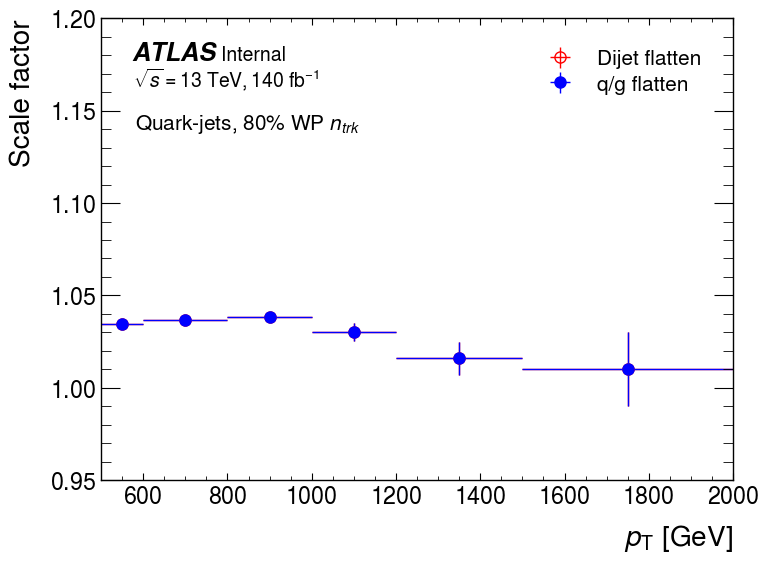

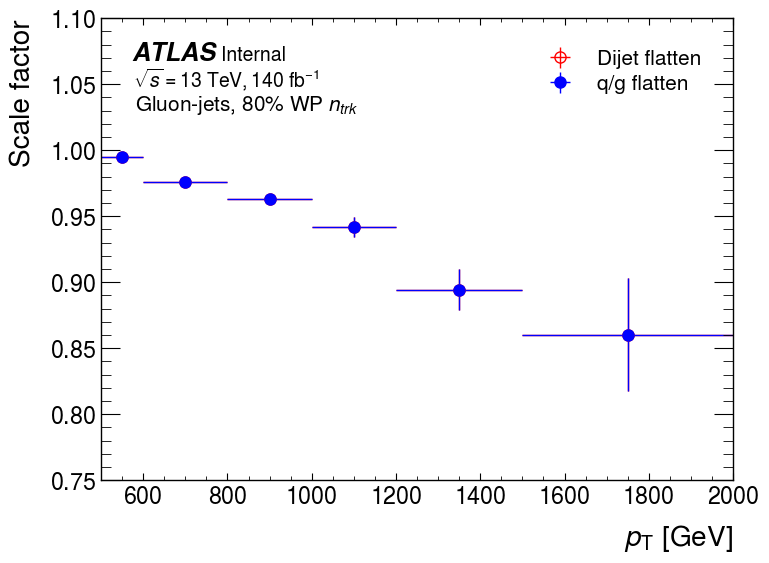

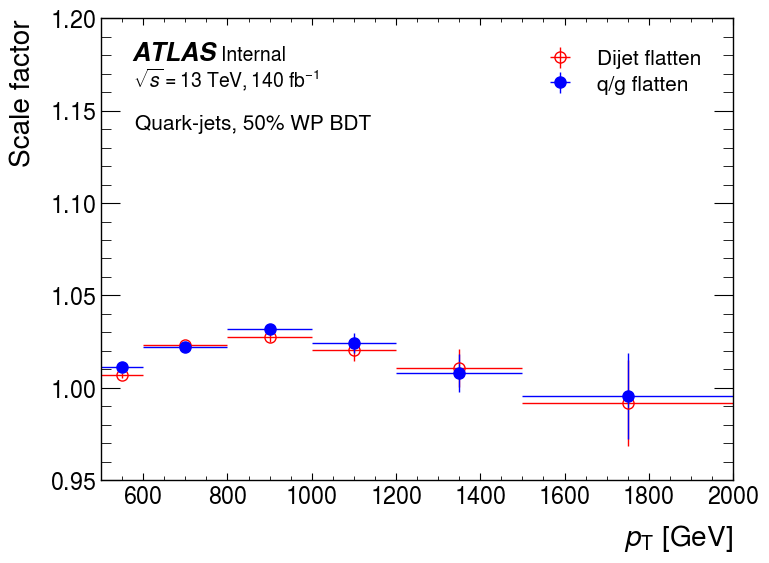

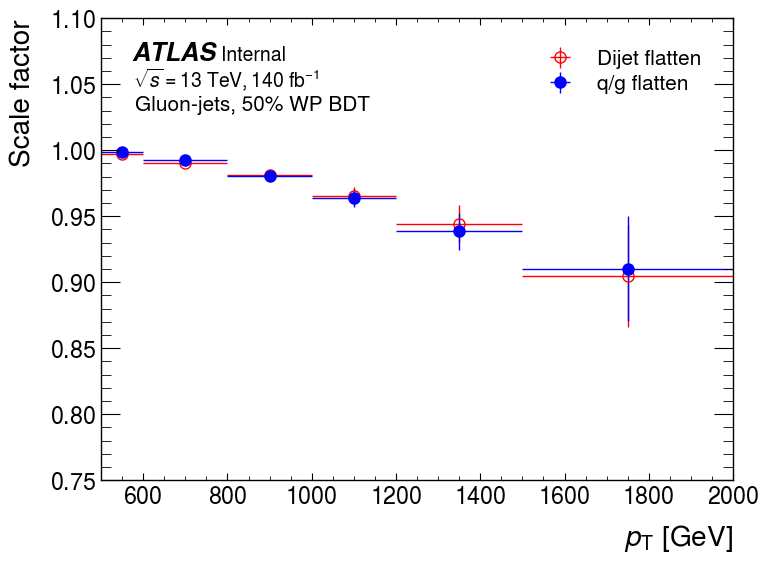

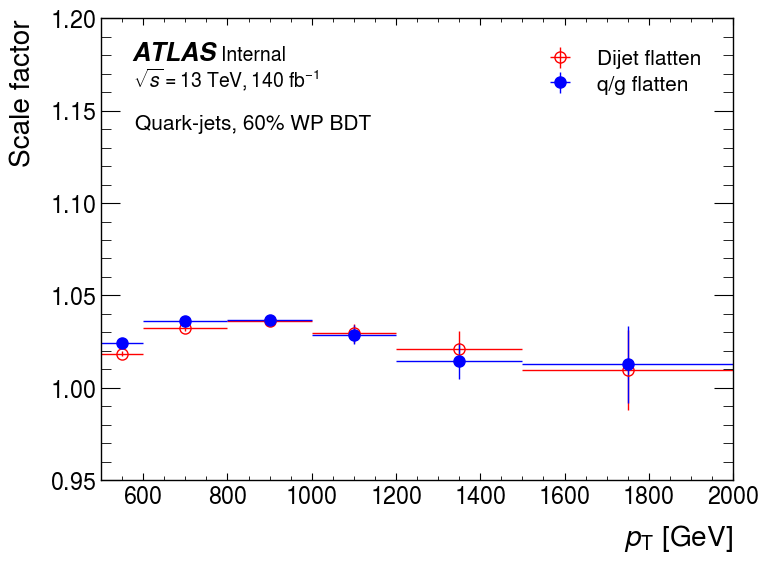

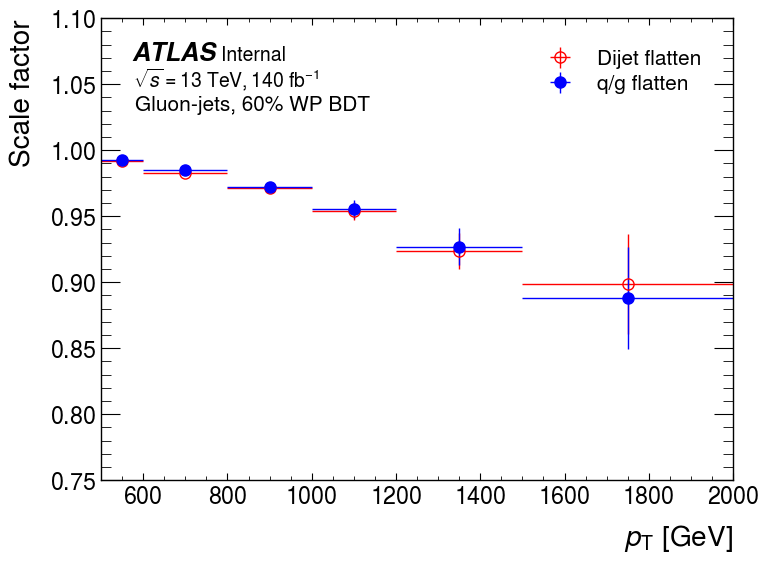

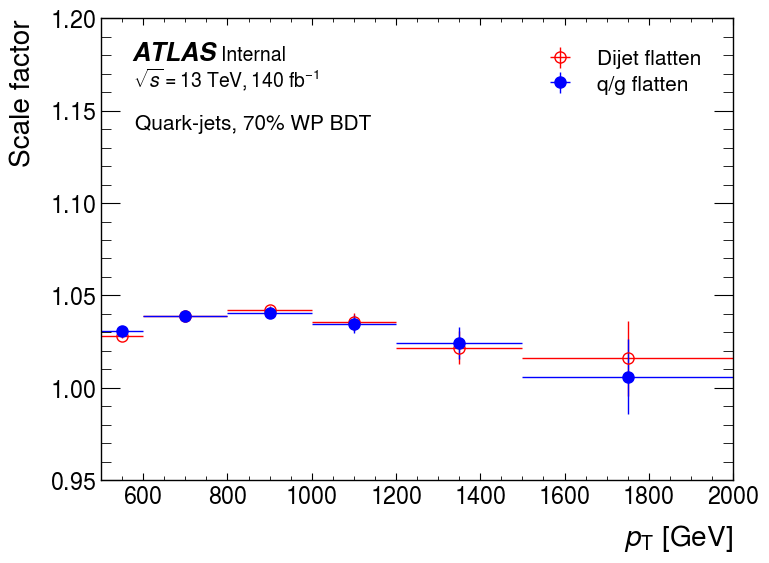

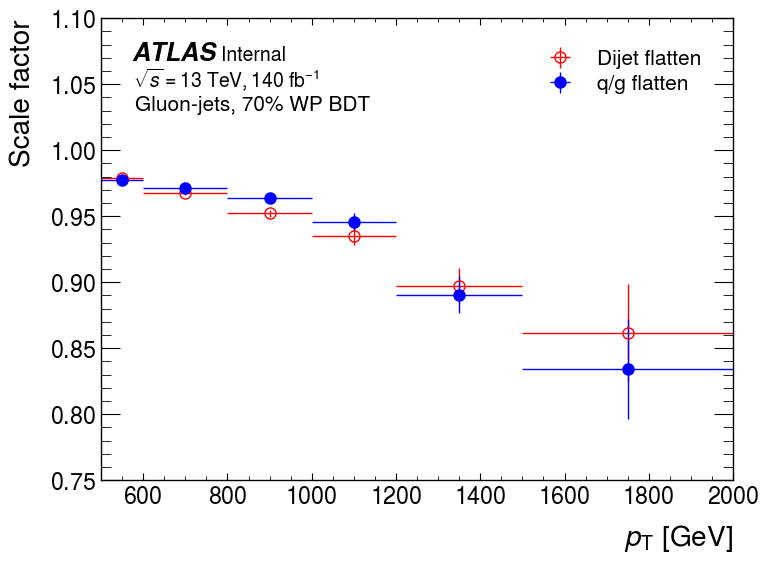

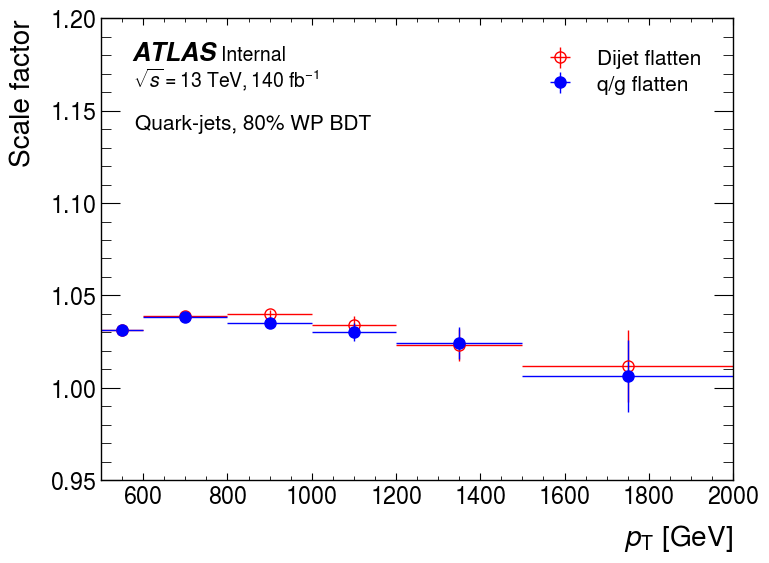

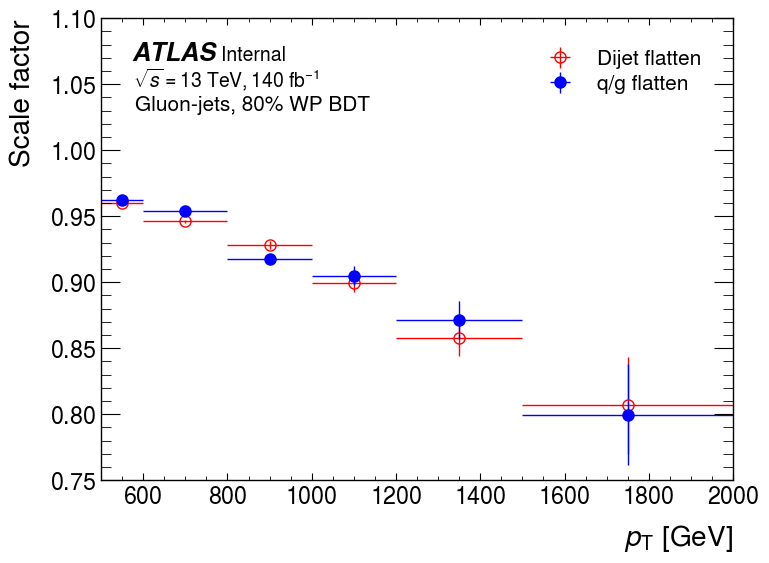

In [17]:

bin_centers1 = [500,700,900,1100,1350,2000]
#label_pt_bin = label_eta_bin

#linestyle_list=['-',':',"-.","--"]
color_list=['forestgreen','yellow','cyan','orchid']

e = 0
for i_var, reweighting_var in enumerate(reweighting_vars):

    nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'SFs_pkls'
    nominal_SFs = joblib.load(nominal_path / nominal_keys[i_var] / "SFs.pkl") # this includes many vars with WPs 
    
    qg_path='/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_qg/nominal/plots/ADE/SFs_pkls'
    qg_path = Path(qg_path)
    qg_SFs = joblib.load(qg_path / nominal_keys[i_var] / "SFs.pkl")

    for WP in WPs:
        WP1=int(WP*100)
        for parton in ['Quark','Gluon']:
            fig, ax = plt.subplots()
            quark_nominal_values = unumpy.nominal_values(nominal_SFs[reweighting_var][WP][parton])
            q_dev=unumpy.std_devs(nominal_SFs[reweighting_var][WP][parton])
            
            qg_values = unumpy.nominal_values(qg_SFs[reweighting_var][WP][parton])
            qg_dev=unumpy.std_devs(qg_SFs[reweighting_var][WP][parton])
            #quark_total_uncertainty = []

            # for indx, key in enumerate(syst_total[reweighting_var].keys()):
            #    # indx = list(syst_total[reweighting_var]).index(key)
            #     indc = ind_all[indx]
            #     quark_uncertainty = syst_total[reweighting_var][key][WP][parton]
            #     quark_total_uncertainty.append(syst_total[reweighting_var][key][WP][parton])

       
            # quark_total_uncertainty = np.sqrt(np.sum(np.power(quark_total_uncertainty, 2), axis=0))

            #print(f"{parton} {reweighting_var} SF: ",quark_nominal_values)#,"syst: ",quark_total_uncertainty)
            
            #ax.fill_between(bin_centers1,quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty,alpha=0.2, label=f'Total uncertainty',facecolor='b',edgecolor='b')
            hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Dijet flatten',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev,color='r',marker='o',mfc='none',markersize=8)
            hep.histplot(qg_values,bins=label_pt_bin,label='q/g flatten',ax=ax,histtype='errorbar',xerr=True,yerr=qg_dev,color='b',marker='o',markersize=8)

            #### eta bin
            # hep.histplot(quark_nominal_values,bins=label_pt_bin,label=f'{parton} jets',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev,color='b',marker='o',markersize=4)
            # ax.fill_between(label_pt_bin,yerr_sf[e]-yerr_eta[e], yerr_sf[e]+yerr_eta[e], facecolor = 'orange', alpha=0.3,label='Total uncertainty')
            # e+=1
            
            # ax[0].fill_between(bin_centers1, quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty, \
            #                     facecolor='blue', alpha=0.1, label=f'Total uncertainty')

            # ax[1].fill_between(bin_centers1, gluon_nominal_values-gluon_total_uncertainty, gluon_nominal_values+gluon_total_uncertainty, \
            #                     facecolor='red', alpha=0.1, label=f'Total uncertainty')
            #parton_total_uncertainty[reweighting_var][WP]['Quark'] = quark_total_uncertainty
            #parton_total_uncertainty[reweighting_var][WP]['Gluon'] = gluon_total_uncertainty
            ax.set_xlim(label_pt_bin[0], label_pt_bin[-1])
            if parton == 'Quark':
                ax.set_ylim(0.95,1.2) #0.4,1.9
                ax.text(580,1.14,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1

            else:
                ax.set_ylim(0.75,1.1)
                ax.text(580,1.03,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1
           
            ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')
            #ax.set_xlabel('$\eta$')

            ax.set_ylabel('Scale factor')
            ax.legend(fontsize=15)
            hep.atlas.label(label='Internal',ax=ax,lumi=140,data=True)

            fig.savefig(f"../syst_qg/{reweighting_var}_WP{WP}_{parton}.pdf")




In [18]:
joblib.dump(syst_total, "syst_total.pkl")

['syst_total.pkl']

In [19]:
joblib.dump(parton_total_uncertainty, "parton_total_uncertainty.pkl")

['parton_total_uncertainty.pkl']

In [23]:
syst_total['jet_nTracks']['splitting_kernel']

{0.5: {'Quark': array([0.00479377, 0.00373218, 0.00618231, 0.01190659, 0.01192551,
         0.00554446]),
  'Gluon': array([0.02307621, 0.00340092, 0.00330859, 0.00972244, 0.00612659,
         0.00879747])},
 0.6: {'Quark': array([0.00679909, 0.00038772, 0.00939995, 0.01768852, 0.01266658,
         0.00177794]),
  'Gluon': array([0.03366858, 0.00786916, 0.00949555, 0.01128397, 0.00282307,
         0.01520322])},
 0.7: {'Quark': array([0.00959693, 0.00477607, 0.01219916, 0.02016862, 0.01713152,
         0.00392115]),
  'Gluon': array([0.04365054, 0.01102636, 0.01449581, 0.01321997, 0.00154817,
         0.01148519])},
 0.8: {'Quark': array([0.00906792, 0.00733398, 0.01371802, 0.0179946 , 0.01580308,
         0.0053429 ]),
  'Gluon': array([0.06587212, 0.01909747, 0.0238449 , 0.03009573, 0.01262439,
         0.02484032])}}

In [20]:
parton_total_uncertainty

{'jet_nTracks': {0.5: {'Quark': array([0.18585691, 0.19164053, 0.21062485, 0.20645033, 0.21489485,
          0.19169785]),
   'Gluon': array([0.10972334, 0.11961314, 0.13465004, 0.15066548, 0.14893562,
          0.1822982 ])},
  0.6: {'Quark': array([0.16131077, 0.16631016, 0.18323686, 0.17884367, 0.18321393,
          0.16615847]),
   'Gluon': array([0.16617617, 0.17866711, 0.18429588, 0.19714382, 0.20181045,
          0.25164855])},
  0.7: {'Quark': array([0.14214463, 0.14334478, 0.15928762, 0.15783645, 0.14866932,
          0.12604009]),
   'Gluon': array([0.22939114, 0.23559411, 0.2447131 , 0.26354632, 0.28469486,
          0.35199699])},
  0.8: {'Quark': array([0.11255132, 0.11310967, 0.12646322, 0.11713234, 0.10777963,
          0.09532423]),
   'Gluon': array([0.34306785, 0.32952601, 0.34335404, 0.3895073 , 0.40806833,
          0.49090712])}},
 'GBDT_newScore': {0.5: {'Quark': array([0.16841092, 0.17684388, 0.19647771, 0.20075571, 0.20418881,
          0.17664429]),
   'Gluon':